# Problem Statement
A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

The company wants to know the following things:

- Which variables are significant in predicting the price of a car?
- How well do those variables describe the price of a car?

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the American market. 

 

## Business Goals

You are required to model the price of cars with the available independent variables. The management will use this model to understand exactly how the prices vary with the independent variables. Accordingly, they can change the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will allow the management to understand the pricing dynamics of a new market.

In [338]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

# Reading and Understanding the Data

In [339]:
car = pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [340]:
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Visualising the data (EDA)

### Data Preparation
There is a variable named CarName that comprises two parts: the first word is the name of the car company, and the second is the car model. For example,Chevrolet Impala has ‘Chevrolet’ as the car company name and ‘Impala’ as the car model name. You need to consider only the company name as the independent
variable for model building.

In [341]:
# updating the CarName column as stated in the Data Preparation section
car["CarName"] = car["CarName"].apply(func=lambda x: x.split()[0])

In [342]:
car["CarName"].value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [343]:
# fixing the CarName Column as there are some spelling mistakes in the Company Names of cars
def correction(x):
    if x == "porcshce":
        return "porsche"
    elif x == "Nissan":
        return "nissan"
    elif x == "vokswagen":
        return "volkswagen"
    elif x == "toyouta":
        return "toyota"
    elif x == "maxda":
        return "mazda"
    else:
        return x
car["CarName"] = car["CarName"].apply(func=lambda x: correction(x))

In [344]:
car["CarName"].value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
mercury         1
Name: count, dtype: int64

##### Combining Rare Categories

This involves combining infrequent categories into a single category. This reduces the number of unique categories and also reduces the sparsity in the data representation.

In [345]:
# Aggregating Values: combining the rare categories into others
def combining_cate(x):
    if x == "renault":
        return "others"
    elif x == "vw":
        return "others"
    elif x == "mercury":
        return "others"
    else:
         return x
car["CarName"] = car["CarName"].apply(func=lambda x: combining_cate(x))

In [346]:
car["CarName"].value_counts()

CarName
toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen     10
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
others          5
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
Name: count, dtype: int64

In [347]:
car.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
92,93,1,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.290,9.40,69,5200,31,37,6849.0
91,92,1,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.290,9.40,69,5200,31,37,6649.0
132,133,3,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.070,9.31,110,5250,21,28,11850.0
99,100,0,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.470,8.50,97,5200,27,34,8949.0
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.870,8.80,134,5500,18,23,21485.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.360,9.00,69,4900,31,36,5118.0
55,56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.40,101,6000,17,23,10945.0
38,39,0,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.580,9.00,86,5800,27,33,9095.0
37,38,0,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.580,9.00,86,5800,27,33,7895.0


##### Looking at symboling

In [348]:
car["symboling"].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

##### Looking at fueltype variable

In [349]:
car["fueltype"].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

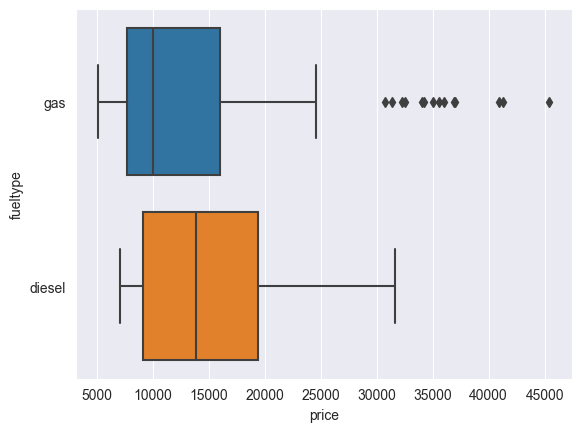

In [350]:
plt.figure()
sns.boxplot(data=car, x="price", y="fueltype")
plt.show()

##### looking at aspiration variable

In [351]:
car["aspiration"].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

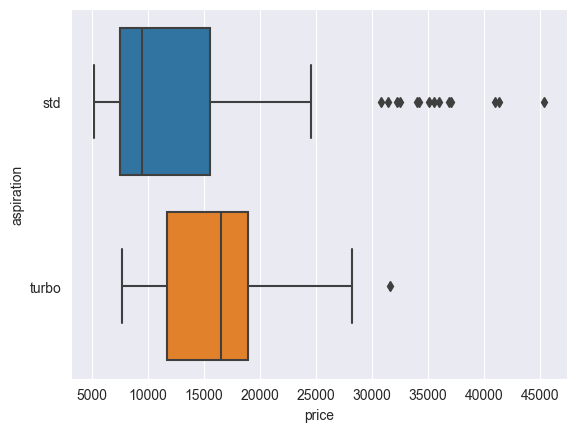

In [352]:
plt.figure()
sns.boxplot(data=car, x="price", y="aspiration")
plt.show()

##### Looking at doornumber variable

In [353]:
car["doornumber"].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

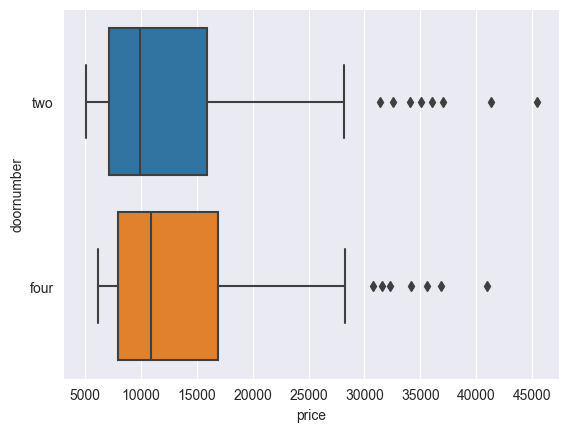

In [354]:
plt.figure()
sns.boxplot(data=car, x="price", y="doornumber")
plt.show()

##### Looking at carbody variable

In [355]:
car["carbody"].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

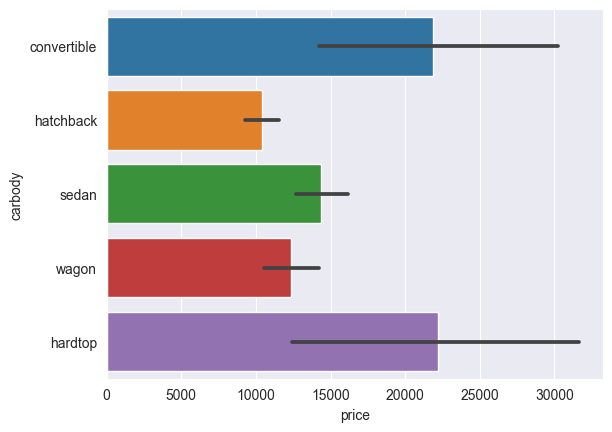

In [356]:
plt.figure()
sns.barplot(data=car, x="price", y="carbody")
plt.show()

##### Looking at drivewheel variable

In [357]:
car["drivewheel"].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

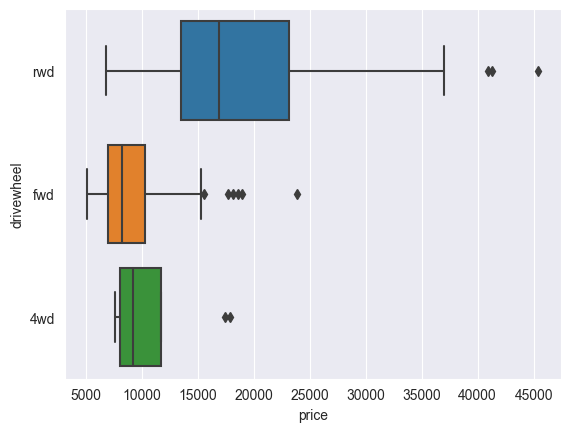

In [358]:
plt.figure()
sns.boxplot(data=car, x="price", y="drivewheel")
plt.show()

##### Looking at enginelocation

In [359]:
car["enginelocation"].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

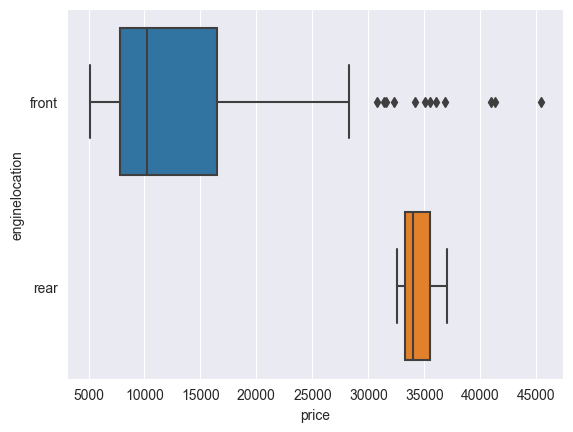

In [360]:
plt.figure()
sns.boxplot(data=car, x="price", y="enginelocation")
plt.show()

In [361]:
car.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
14,15,1,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
139,140,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0
194,195,-2,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
64,65,0,mazda,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245.0
134,135,3,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
123,124,-1,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0
184,185,2,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0
96,97,1,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
77,78,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189.0
25,26,1,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0


##### Looking at enginetype

In [362]:
car["enginetype"].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

##### looking at cylindernumber variable

In [363]:
car["cylindernumber"].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

##### looking at fuelsystem variable

In [364]:
car["fuelsystem"].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

### Looking at numerical variables

In [365]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### Dropping the car_id Column

In [366]:
car = car.drop("car_ID", axis=1)
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


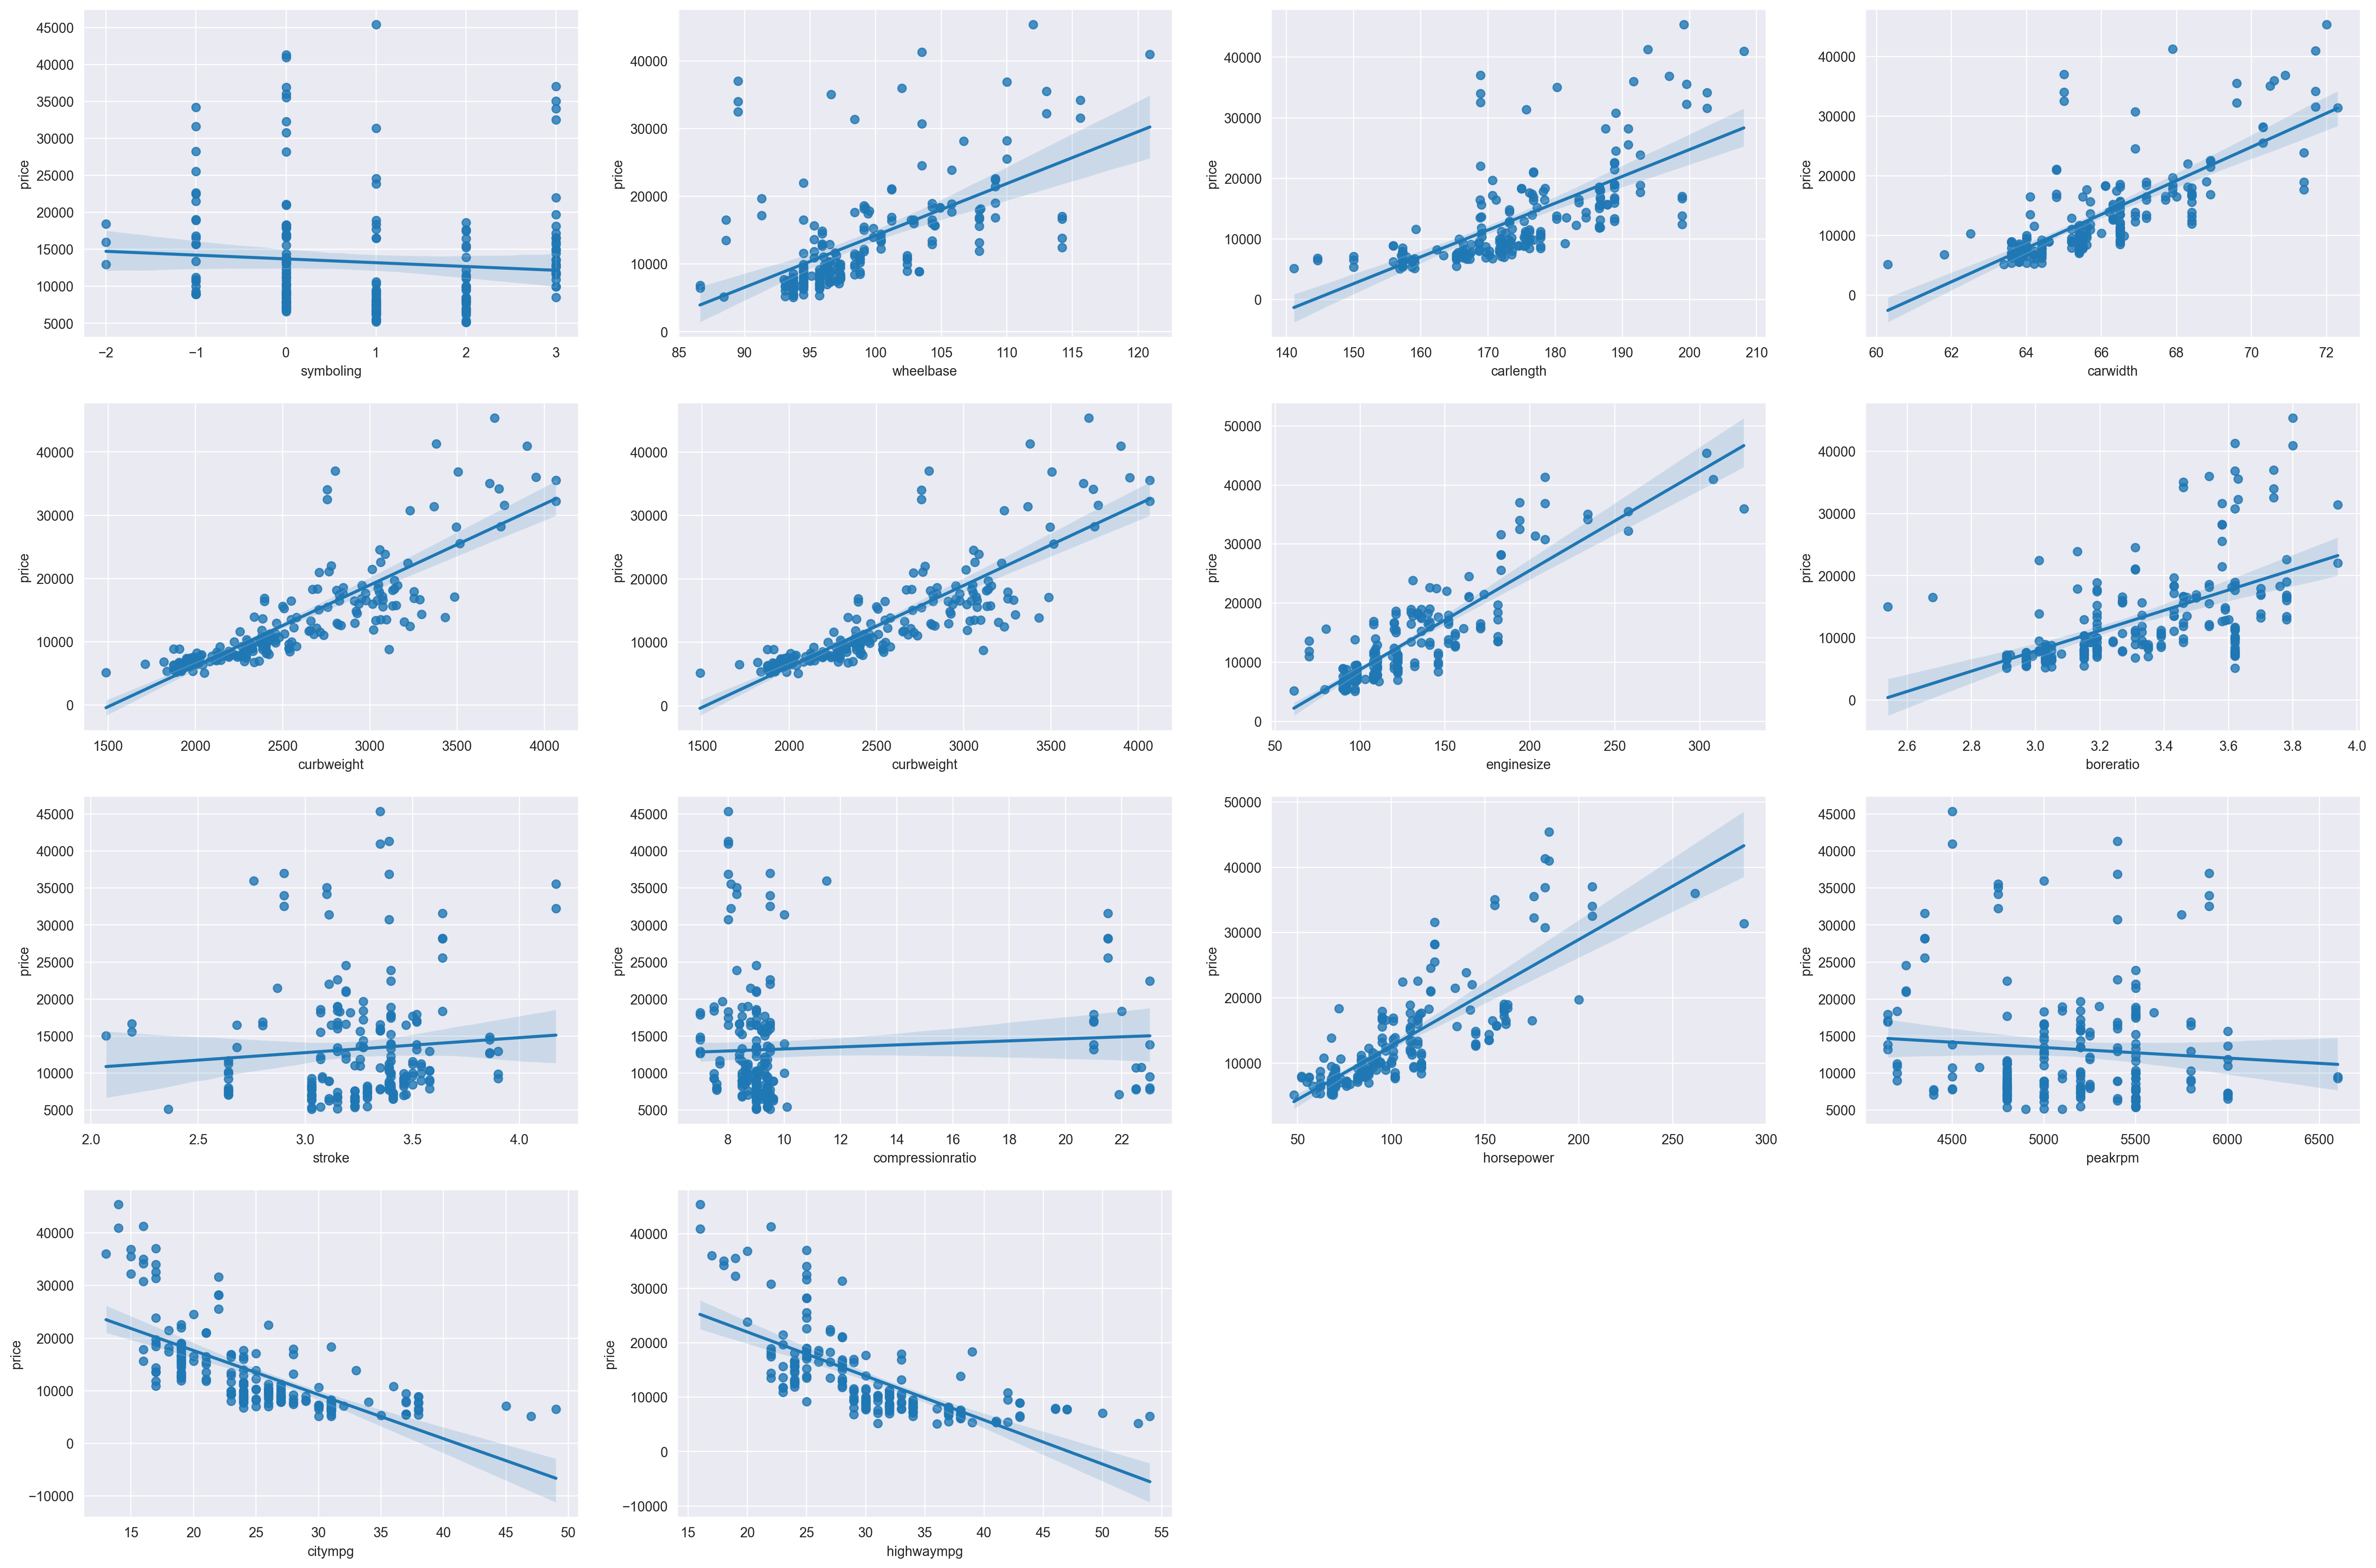

In [367]:
num_var_lst = ["symboling", "wheelbase", "carlength", "carwidth", "curbweight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]
plt.figure(figsize=(30,20), dpi=220)
for i in range(0, len(num_var_lst)):
    plt.subplot(4, 4, i + 1)
    plt.xlabel(num_var_lst[i], fontsize=10)
    sns.regplot(data=car, x=num_var_lst[i], y="price")
plt.show()

In [368]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


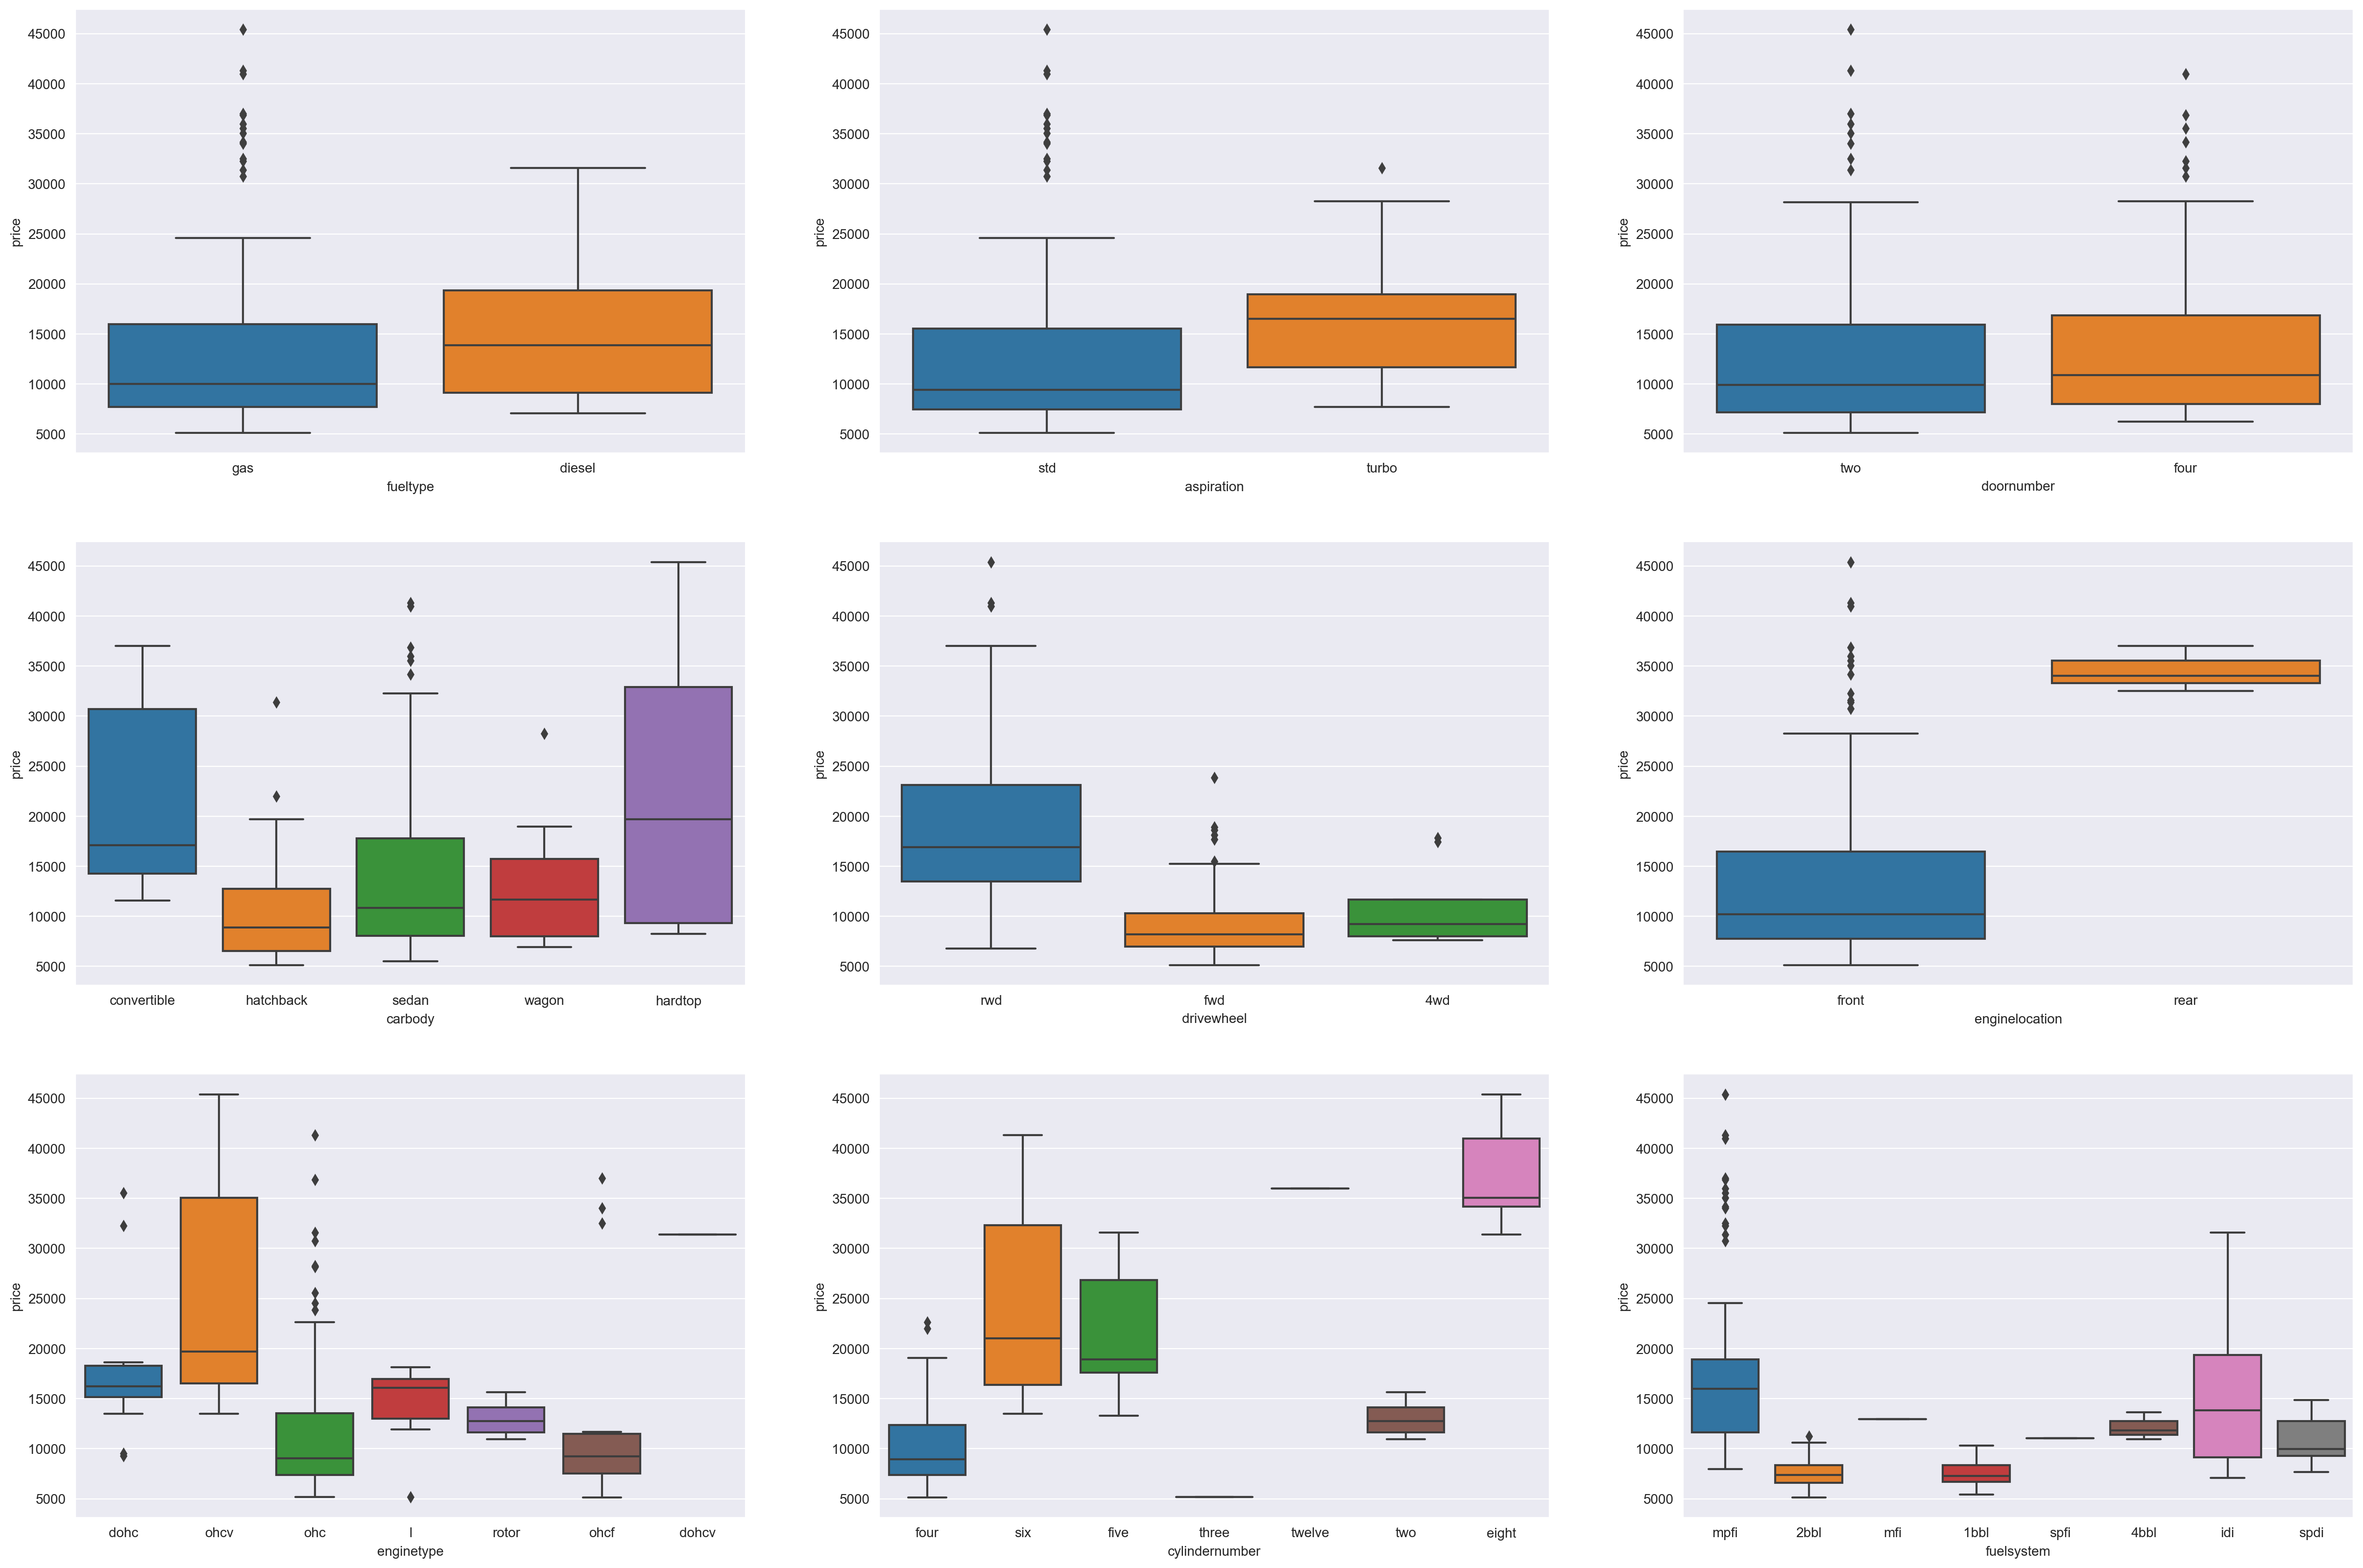

In [369]:
# visualising the categorical variables
category_var_lst = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]
plt.figure(figsize=(30,20), dpi=200)
for i in range(0, len(category_var_lst)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=car, x=category_var_lst[i], y="price")
plt.show()

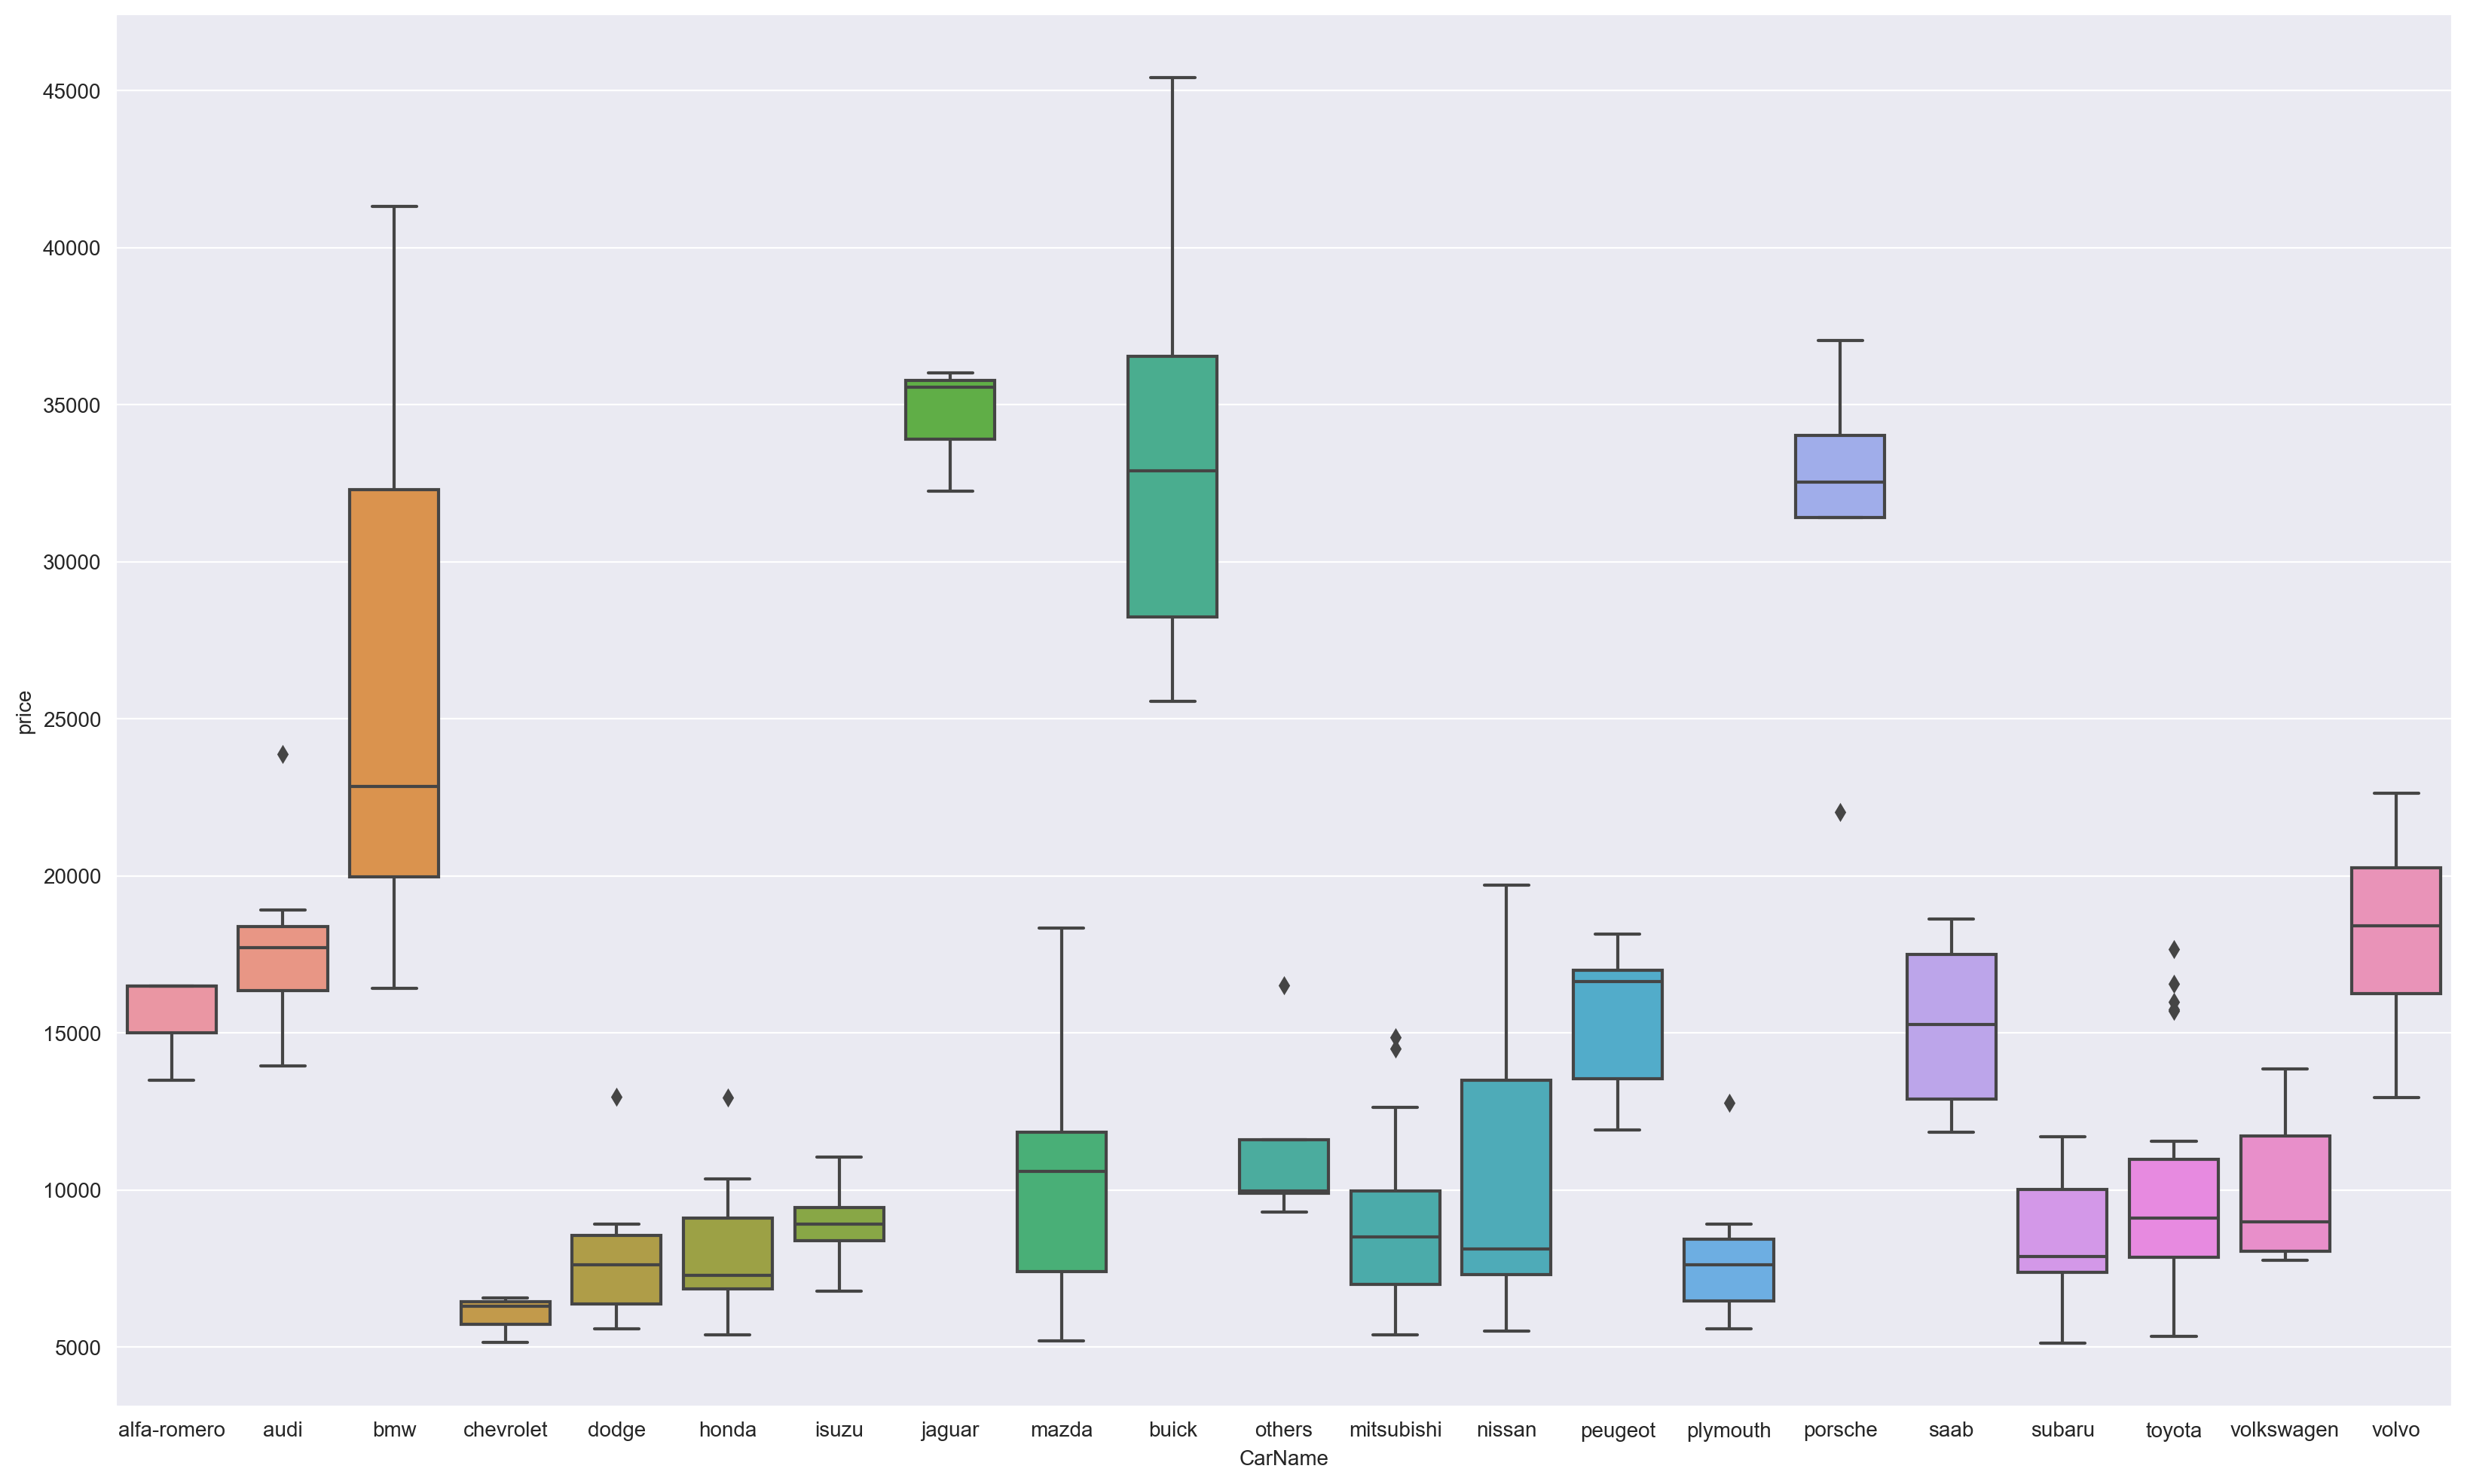

In [370]:
plt.figure(figsize=(20,12), dpi=200)
sns.boxplot(data=car, x="CarName", y="price")
plt.show()

## Data Preparation
Creating Dummy variables

In [371]:
car.sample(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
111,0,peugeot,gas,std,four,sedan,rwd,front,107.9,186.7,...,120,mpfi,3.46,2.190,8.4,95,5000,19,24,15580.0
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.390,8.0,182,5400,16,22,41315.0
187,2,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,...,97,idi,3.01,3.400,23.0,68,4500,37,42,9495.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
185,2,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.400,9.0,85,5250,27,34,8195.0
122,1,plymouth,gas,std,four,sedan,fwd,front,93.7,167.3,...,98,2bbl,2.97,3.230,9.4,68,5500,31,38,7609.0
197,-1,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.150,9.5,114,5400,24,28,16515.0
30,2,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,...,92,1bbl,2.91,3.410,9.6,58,4800,49,54,6479.0
40,0,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,10295.0
186,2,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.400,9.0,85,5250,27,34,8495.0


In [372]:
car = pd.get_dummies(data=car, drop_first=True, dtype=int)
car.sample(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
129,1,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,...,0,0,0,0,0,0,0,1,0,0
44,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,...,0,0,0,1,0,0,0,0,0,0
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,...,0,0,0,0,0,0,0,0,0,0
46,2,96.0,172.6,65.2,51.4,2734,119,3.43,3.23,9.2,...,0,0,0,0,0,0,0,0,0,1
197,-1,104.3,188.8,67.2,57.5,3042,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
204,-1,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
87,1,96.3,172.4,65.4,51.6,2403,110,3.17,3.46,7.5,...,0,0,0,0,0,0,0,0,1,0
82,3,95.9,173.2,66.3,50.2,2833,156,3.58,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [373]:
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size=0.7, random_state=100)

In [374]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.797203,98.523077,173.416783,65.839860,53.551748,2539.510490,124.958042,3.307413,3.250070,10.052587,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.195999,5.961835,12.598122,2.214203,2.433766,544.650539,40.974034,0.260997,0.312529,3.794890,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,97.000000,3.065000,3.110000,8.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,110.000000,3.310000,3.270000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,141.000000,3.540000,3.400000,9.400000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,3.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


### Preprocessing
##### Using the MinMaxScaler to rescale the features

In [375]:
scaler = MinMaxScaler()

# apply MinMaxScaler to all the variables except the dummy variables and yes no variables
scaler_vars = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

In [376]:
df_train.sample(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
23,0.6,0.244828,0.263415,0.291667,0.265487,0.248254,0.139623,0.277778,0.606061,0.03750,...,0,0,0,0,0,0,0,1,0,0
130,0.4,0.327586,0.656911,0.516667,0.654867,0.423196,0.267925,0.619048,0.863636,0.10625,...,0,0,0,0,0,0,0,1,0,0
127,1.0,0.100000,0.452033,0.391667,0.336283,0.491854,0.501887,0.841270,0.358586,0.15625,...,0,0,0,0,0,0,0,1,0,0
22,0.6,0.244828,0.263415,0.291667,0.265487,0.150504,0.109434,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
82,1.0,0.320690,0.521951,0.500000,0.212389,0.521722,0.358491,0.714286,0.843434,0.00000,...,0,0,0,0,0,0,0,0,1,0
177,0.2,0.544828,0.560976,0.516667,0.539823,0.376261,0.230189,0.500000,0.681818,0.10625,...,0,0,0,0,0,0,0,1,0,0
202,0.2,0.775862,0.775610,0.716667,0.681416,0.591156,0.422642,0.714286,0.343434,0.11250,...,0,0,0,0,0,0,0,1,0,0
94,0.6,0.272414,0.393496,0.291667,0.592920,0.179597,0.135849,0.373016,0.555556,0.15000,...,0,0,0,1,0,0,0,0,0,0
66,0.4,0.631034,0.551220,0.483333,0.584071,0.470132,0.275472,0.595238,0.732323,0.93750,...,0,0,0,0,0,1,0,0,0,0
121,0.6,0.244828,0.426016,0.291667,0.265487,0.194337,0.109434,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0


##### Dividing into X_train and y_train

In [377]:
y_train = df_train.pop("price")
X_train = df_train

In [378]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [379]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


### Using RFE to reduce the variables for the model

In [380]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [381]:
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [382]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 50),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 37),
 ('highwaympg', False, 26),
 ('CarName_audi', False, 35),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 36),
 ('CarName_chevrolet', False, 23),
 ('CarName_dodge', False, 20),
 ('CarName_honda', False, 22),
 ('CarName_isuzu', False, 51),
 ('CarName_jaguar', False, 27),
 ('CarName_mazda', False, 42),
 ('CarName_mitsubishi', False, 13),
 ('CarName_nissan', False, 41),
 ('CarName_others', False, 45),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 19),
 ('CarName_porsche', True, 1),
 ('CarName_saab', False, 9),
 ('CarName_subaru', False, 11),
 ('CarName_toyota', False, 43),
 ('CarName_volkswagen', False, 44),
 ('CarName_volvo', Fals

In [383]:
columns_to_take = X_train.columns[rfe.support_]
columns_to_take

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'CarName_bmw',
       'CarName_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [384]:
X_train_rfe = X_train[columns_to_take]
X_train_rfe

,carwidth,curbweight,enginesize,boreratio,CarName_bmw,CarName_porsche,enginelocation_rear,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0,1,0,0,0,0
166,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,0.425000,0.354926,0.184906,0.388889,0,0,0,0,0,0
103,0.516667,0.609775,0.452830,0.595238,0,0,0,0,0,0
67,0.833333,0.786268,0.460377,0.714286,0,0,0,0,0,0
24,0.291667,0.185803,0.109434,0.230159,0,0,0,0,0,0


## Building a linear model using statsmodels library

In [385]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

#### Checking the summary and the vif

In [386]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.21e-64
Time:                        18:01:34   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [387]:
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.19
2,curbweight,9.26
3,enginesize,7.23
1,carwidth,4.92
4,boreratio,1.85
6,CarName_porsche,1.82
7,enginelocation_rear,1.66
9,cylindernumber_twelve,1.49
10,cylindernumber_two,1.24
5,CarName_bmw,1.13


VIF should be < 5
we could have :
-    High cases: high p value and high vif
- high-low cases: high p value and low vif # remove these first
                   or low p value and high vif # remove these after the one above
- low cases: low p and low vif

In [388]:
# removing cylindernumber_twelve as it has high p_value
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis=1)

In [389]:
# rebuilding the model without the cylindernumber_twelve
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.18e-65
Time:                        18:01:34   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [390]:
# calculating vif
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.15
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
6,CarName_porsche,1.80
7,enginelocation_rear,1.65
9,cylindernumber_two,1.17
5,CarName_bmw,1.09
8,cylindernumber_three,1.05


In [391]:
# removing curbweight as it has high vif
X_train_new = X_train_new.drop(["curbweight"], axis=1)

In [392]:
# Rebuilding the Model without curbweight
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.01e-63
Time:                        18:01:34   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [393]:
# seeing the vif
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
5,CarName_porsche,1.67
6,enginelocation_rear,1.64
8,cylindernumber_two,1.14
4,CarName_bmw,1.09
7,cylindernumber_three,1.05


In [394]:
# removing boreratio as it has high p value
X_train_new = X_train_new.drop(["boreratio"], axis=1)

In [395]:
# Rebuilding the Model without boreratio
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.04e-64
Time:                        18:01:34   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1925 

In [396]:
# seeing the vif
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.41
2,enginesize,3.02
1,carwidth,2.86
5,enginelocation_rear,1.64
4,CarName_porsche,1.59
7,cylindernumber_two,1.13
3,CarName_bmw,1.09
6,cylindernumber_three,1.05


In [397]:
# dropping CarName_porsche as it has high p value
X_train_new = X_train_new.drop(["CarName_porsche"], axis=1)

In [398]:
# Rebuilding the Model without CarName_porche
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.62e-64
Time:                        18:01:34   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

In [399]:
# seeing the vif
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.11
2,enginesize,3.02
1,carwidth,2.75
6,cylindernumber_two,1.12
3,CarName_bmw,1.09
4,enginelocation_rear,1.08
5,cylindernumber_three,1.05


The Important Variables are: 
- Engine Size
- Car Width
- If No.of.cylinders are two
- If the car is BMW
- If the engine location is front and rear
- If No.of.cylinders are Three

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [400]:
y_train_price = lm.predict(X_train_new)

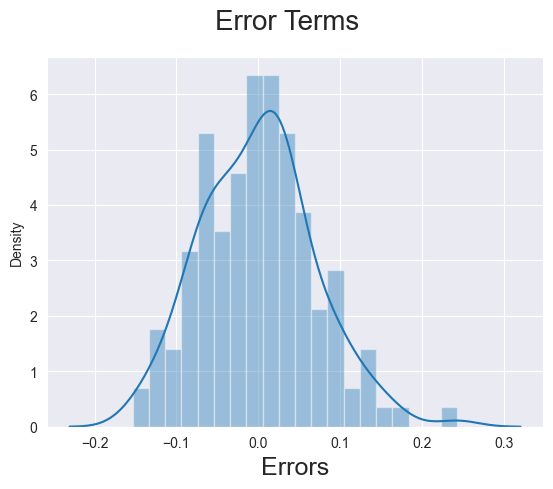

In [401]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [402]:
df_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,...,0,0,0,1,0,0,0,0,0,0
186,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,...,0,0,0,0,0,0,0,1,0,0
59,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,...,0,0,0,1,0,0,0,0,0,0
165,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,...,0,0,0,0,0,0,0,1,0,0
140,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
29,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,7.0,...,0,0,0,0,0,0,1,0,0,0
182,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0
40,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,9.0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
scaler_vars_test = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

# apply MinMaxScaler to all the variables except the dummy variables and yes-no variables
df_test[scaler_vars_test] = scaler.transform(df_test[scaler_vars_test])

In [404]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [405]:
y_test = df_test.pop('price')
X_test = df_test

In [406]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [407]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_new.columns]

In [408]:
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

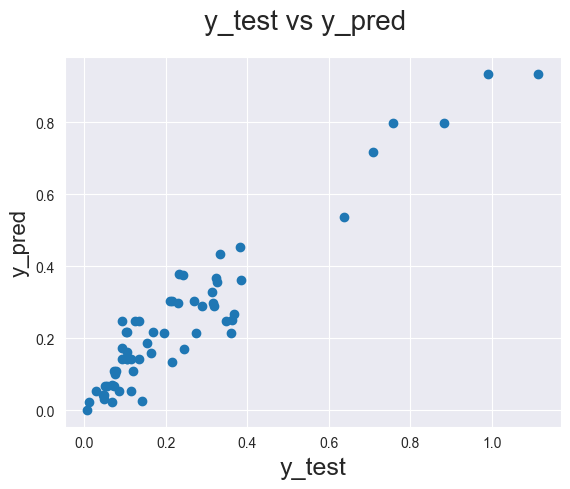

In [409]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

## Model Evaluation

When you are done with model building and residual analysis and have made predictions on the test set, ensure that you use the following two lines of code to calculate the R-squared score on the test set:

In [410]:
r2_score(y_test, y_test_pred)

0.9013443522816882